# Cleaning data (detection of outliers) using one class SVM 

$\nu$ proportion of outliers must be defined by the user. It is an input of the model
similarly the choice of the kernel.

In [2]:
# import libraries, seaborn and sys can be removed. Oher must be kept

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
import sys
sns.set(color_codes=True)
%matplotlib inline

# import tools from sklearn library

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

#import library for reading files in a specific directory

import os

# import tools from csv library in order to read and write a new csv file

from csv import reader
from csv import writer

# import library in order to move file to a desire location

import shutil

Data cleaning to all data sets

In [3]:
# count the file in location 'Data/Data_svenja_csv'. This folder contains csv files with original data
# This location can be changed by the user.

max=0
for files in os.listdir('Data/Data_svenja_csv'):
    max=max+1
print(max) # check the number of files in that location

# removing outliers/anomalies

for j in range(1,max):
    name=os.listdir('Data/Data_svenja_csv')[j] #reading name of csv file j at location 'Data/Data_svenja_csv'
    print(name)  #check that files have been reading correctly
    dataset=pd.read_csv(name,header=None) # read csv file using pandas
    X1=dataset.values[:,[0,4,5]]          # convert to array inputs and time in csv file j 
    
    # rescale data to a new data with mean value=0 and standard deviation 1
    sc_input=StandardScaler()  # instantiate StandardScaler
    X1_scale=sc_input.fit_transform(X1) #fit StandardScaler to data set
    outliers_fraction=0.35        #proportion of outliers defined by the user. Default values by the program is 0.5
    
    #defining One-class SVM model: kernel='rbf' is the most robust, other kernels that can be used are:
    # linear = ‘linear’, 
    # polynomial = ‘poly’ if this is used , it must be added the degree of the polynomial:degree=value (default=3)
    #‘sigmoid’ for probabilistic problems, 
    #‘precomputed’ kernel predifing by the user as a function
    # also a linear combination de ellos could be considered, for instance: kernel=0.5*'rbf'+0.5*'linear'
    # nu=outliers_fraction : proportion of outliers defined by the user
    # gamma='scale' considering the predefined scale. Do not change it
    
    clf1 = OneClassSVM(kernel='rbf',nu=outliers_fraction,gamma='scale').fit(X1_scale[:,[0,1]]) #fit One-class SVM to time and air volumetric flow
    z1=clf1.predict(X1_scale[:,[0,1]])  # separate inliers from outliers
    
    # remove outlier from data set
    
    # first create a new file where inliers will be added
    # open('file name,r') open original csv file (before removing outliers)
    # open(name.split('.')[0]+'.'+name.split('.')[1]+'_'+str(outliers_fraction)+'.csv', 'w', newline='') as write_obj:it
    # opens a new csv file called 'name.split('.')[0]'+'name.split('.')[1]+'_'+str(outliers_fraction)+'.csv'
    # for instance 'data_1'+'2_1'+'_'+'proportion of outliers'+'.csv'
    # this file is open and prepared for writing over it the inliers
    with open(name, 'r') as read_obj,\
        open(name.split('.')[0]+'.'+name.split('.')[1]+'_'+str(outliers_fraction)+'.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
        csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
        csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
        i=0
        for row in csv_reader:
            if (z1[i]!=[-1]):            #if data is not classified as outliers, it will be written in the new file
                csv_writer.writerow(row) #adding row to the new file
            i=i+1
    
    # after removing outliers respect to oxigen, we will do the same with respect to hidrogen
    # proportion of outliers must be provided by the user. Here it is considered nu=0.05
    # the following steps are the similar to the previous ones
    
    # read new csv file where points after removing outliers with respect air are stored
    X2=pd.read_csv(name.split('.')[0]+'.'+name.split('.')[1]+'_'+str(outliers_fraction)+'.csv',header=None).values[:,[0,4,5]]
    sc_input=StandardScaler()  #instantiate StandardScaler
    X2_scale=sc_input.fit_transform(X2)  #fit model to the data set
    outliers_fraction2=0.05              #define proportion of outliers
    # define One-Class SVM model
    clf2 = OneClassSVM(kernel='rbf',nu=outliers_fraction2,gamma='scale').fit(X2_scale[:,[0,2]])
    z2=clf2.predict(X2_scale[:,[0,2]]) # classify inliers from outliers 
    
    #open file with data after removing outliers with respect to oxigen
    #open new file where we will add inliers after removing outliers respect to hidrogen
    #new file name has the following shape 'data_eq.ratio_1_proportion outlier oxigen_porportion  outlier hydrogen'
    #name can be changed by the user
    
    with open(name.split('.')[0]+'.'+name.split('.')[1]+'_'+str(outliers_fraction)+'.csv', 'r') as read_obj, \
        open(name.split('.')[0]+'.'+name.split('.')[1]+'_'+str(outliers_fraction)+'_'+str(outliers_fraction2)+'.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
        csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
        csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
        i=0
        for row in csv_reader:  
            if (z2[i]!=[-1]):       # if point is classified as inlier, it will be written in the new csv file
                csv_writer.writerow(row)
            i=i+1
    
    # new files are created at the location where the python file is. We use shutil to move them to a 
    # new location 'Data/Data_svenja_clean_0.4' 
    newPath = shutil.copy(name.split('.')[0]+'.'+name.split('.')[1]+'_'+str(outliers_fraction)+'_'+str(outliers_fraction2)+'.csv', 'Data/Data_svenja_clean_0.4')
    #remove temporary and new files that were created at python location in order to save memory.
    os.remove(name.split('.')[0]+'.'+name.split('.')[1]+'_'+str(outliers_fraction)+'_'+str(outliers_fraction2)+'.csv')
    os.remove(name.split('.')[0]+'.'+name.split('.')[1]+'_'+str(outliers_fraction)+'.csv')

33
data_0.5125_1.csv
data_0.525_1.csv
data_0.5375_1.csv
data_0.55_1.csv
data_0.5625_1.csv
data_0.575_1.csv
data_0.5875_1.csv
data_0.5_1.csv
data_0.6125_1.csv
data_0.625_1.csv
data_0.6375_1.csv
data_0.65_1.csv
data_0.6625_1.csv
data_0.675_1.csv
data_0.6875_1.csv
data_0.6_1.csv
data_0.7125_1.csv
data_0.725_1.csv
data_0.7375_1.csv
data_0.75_1.csv
data_0.7_1.csv
data_0.8_1.csv
data_0.9_1.csv
data_1.0_1.csv
data_1.1_1.csv
data_1.2_1.csv
data_1.3_1.csv
data_1.4_1.csv
data_1.5_1.csv
data_1.6_1.csv
data_1.7_1.csv
data_1.8_1.csv


Join new data files creating after removing outliers in a single csv file.

In [4]:
# import libraries that will be used to read and join csv file 
import glob  # library for joning multiples csv files 
import csv   # library for manipulating csv files

# directory where csv files are stored
Dir = "C:/Users/MOC1DEV/Data/Data_svenja_clean_0.4"
# directory where a new single file with the whole data points will be stored
# it can be changed by the user
Avg_Dir = "C:/Users/MOC1DEV/Data"

# read csv files in directory Dir
csv_file_list = glob.glob(os.path.join(Dir, '*.csv')) # returns the file list
#print (csv_file_list) # optional for checking list of csv files

# open new single file where data points after reomving outlier will be stored
# open(os.path.join(Avg_Dir, 'new name.csv'), 'w', newline='') as f: 
# new name can be changed. 'w' and newline='' should not be changed
with open(os.path.join(Avg_Dir, 'Output_clean.csv'), 'w', newline='') as f:
    wf = csv.writer(f, lineterminator='\n') # open new single csv file and prepare it to write over it 
                                            # '\n' should not be changed.
    for files in csv_file_list:
        with open(files, 'r') as r: 
            next(r)                   # SKIP HEADERS
            rr = csv.reader(r)        #read csv file in csv_file_list
            for row in rr:
                wf.writerow(row)      #add row to new single csv file

Computing mean, standard deviations and coefficient of variation in order to compare results 
before and after removing outliers/anomalies

In [5]:
max=0
for files in os.listdir('Data/Data_svenja_clean_0.4'):
    max=max+1
print(max)
mean_air_clean=[] #create list for mean volumetric flow air after removing outliers
std_air_clean=[]  #create list for standard deviation air after removing outliers
CV_air_clean=[]   #create list for coefficient of variation after removing outliers
mean_H2_clean=[]  #create list for mean volumetric flow hydrogen after removing outliers
std_H2_clean=[]   #create list for standard deviation hydrogen removing outliers
CV_H2_clean=[]   #create list for coefficient of variation after removing outliers
mean_ratio_clean=[]  #create list for mean equivalence ratio after removing outliers
std_ratio_clean=[]  #create list for standard deviation equivalence ratio after removing outliers
CV_ratio_clean=[]  #create list for coefficient of variation equivalence ratio after removing outliers
mean_sensor_clean=[] #create list for mean sensor measurement after removing outliers
std_sensor_clean=[]  #create list for standard deviation sensor mesurement after removing outliers
CV_sensor_clean=[] #create list for coefficient of variation sensor measurement after removing outliers

# read each data set created after removing outliers and compute the mean, standard deviation anc CV
for j in range(1,max):
    name=os.listdir('Data/Data_svenja_clean_0.4')[j] #location where files after removing outliers are stored 
    print(name)  #check that program is reading whole files at the given location
    dataset=pd.read_csv('Data/Data_svenja_clean_0.4/'+name,header=None) #read csv file
    X1=dataset.values[:,:]    #converting information to arrays
    mean1=np.mean(X1[:,4])    #computing mean values air
    std1=np.std(X1[:,4])      #computing standard deviation of air
    CV1=std1/mean1            #computing coefficient of variation : standard deviation/mean value
    mean_air_clean.append(mean1) #add mean air volumetric flow to a list
    std_air_clean.append(std1)   #add standard deviation air volumetric flow to a list
    CV_air_clean.append(CV1)   #add cv air volumetric flow to a list
    mean1=np.mean(X1[:,5])    #repeat the previous step for hydrogen volumetric flow
    std1=np.std(X1[:,5])
    CV1=std1/mean1
    mean_H2_clean.append(mean1)
    std_H2_clean.append(std1)
    CV_H2_clean.append(CV1)
    mean1=np.mean(X1[:,3])  #repeat the previous step for sensor measurement
    std1=np.std(X1[:,3])
    CV1=std1/mean1
    mean_sensor_clean.append(mean1)
    std_sensor_clean.append(std1)
    CV_sensor_clean.append(CV1)
    mean1=np.mean(X1[:,10]) #repeat previous step for equivalence ratios
    std1=np.std(X1[:,10])
    CV1=std1/mean1
    mean_ratio_clean.append(mean1)
    std_ratio_clean.append(std1)
    CV_ratio_clean.append(CV1)

33
data_0.5125_1_0.35_0.05.csv
data_0.525_1_0.35_0.05.csv
data_0.5375_1_0.35_0.05.csv
data_0.55_1_0.35_0.05.csv
data_0.5625_1_0.35_0.05.csv
data_0.575_1_0.35_0.05.csv
data_0.5875_1_0.35_0.05.csv
data_0.5_1_0.35_0.05.csv
data_0.6125_1_0.35_0.05.csv
data_0.625_1_0.35_0.05.csv
data_0.6375_1_0.35_0.05.csv
data_0.65_1_0.35_0.05.csv
data_0.6625_1_0.35_0.05.csv
data_0.675_1_0.35_0.05.csv
data_0.6875_1_0.35_0.05.csv
data_0.6_1_0.35_0.05.csv
data_0.7125_1_0.35_0.05.csv
data_0.725_1_0.35_0.05.csv
data_0.7375_1_0.35_0.05.csv
data_0.75_1_0.35_0.05.csv
data_0.7_1_0.35_0.05.csv
data_0.8_1_0.35_0.05.csv
data_0.9_1_0.35_0.05.csv
data_1.0_1_0.35_0.05.csv
data_1.1_1_0.35_0.05.csv
data_1.2_1_0.35_0.05.csv
data_1.3_1_0.35_0.05.csv
data_1.4_1_0.35_0.05.csv
data_1.5_1_0.35_0.05.csv
data_1.6_1_0.35_0.05.csv
data_1.7_1_0.35_0.05.csv
data_1.8_1_0.35_0.05.csv


In [6]:
# repeat the same procedure explained above for data before removing outliers
max=0
for files in os.listdir('Data/Data_svenja_csv'):
    max=max+1
print(max)
mean_air_unclean=[]
std_air_unclean=[]
CV_air_unclean=[]
mean_H2_unclean=[]
std_H2_unclean=[]
CV_H2_unclean=[]
mean_ratio_unclean=[]
std_ratio_unclean=[]
CV_ratio_unclean=[]
mean_sensor_unclean=[]
std_sensor_unclean=[]
CV_sensor_unclean=[]
for j in range(1,max):
    name=os.listdir('Data/Data_svenja_csv')[j]
    print(name)
    dataset=pd.read_csv(name,header=None)
    X1=dataset.values[:,:]
    mean1=np.mean(X1[:,4])
    std1=np.std(X1[:,4])
    CV1=std1/mean1
    mean_air_unclean.append(mean1)
    std_air_unclean.append(std1)
    CV_air_unclean.append(CV1)
    mean1=np.mean(X1[:,5])
    std1=np.std(X1[:,5])
    CV1=std1/mean1
    mean_H2_unclean.append(mean1)
    std_H2_unclean.append(std1)
    CV_H2_unclean.append(CV1)
    mean1=np.mean(X1[:,3])
    std1=np.std(X1[:,3])
    CV1=std1/mean1
    mean_sensor_unclean.append(mean1)
    std_sensor_unclean.append(std1)
    CV_sensor_unclean.append(CV1)
    mean1=np.mean(X1[:,10])
    std1=np.std(X1[:,10])
    CV1=std1/mean1
    mean_ratio_unclean.append(mean1)
    std_ratio_unclean.append(std1)
    CV_ratio_unclean.append(CV1)

33
data_0.5125_1.csv
data_0.525_1.csv
data_0.5375_1.csv
data_0.55_1.csv
data_0.5625_1.csv
data_0.575_1.csv
data_0.5875_1.csv
data_0.5_1.csv
data_0.6125_1.csv
data_0.625_1.csv
data_0.6375_1.csv
data_0.65_1.csv
data_0.6625_1.csv
data_0.675_1.csv
data_0.6875_1.csv
data_0.6_1.csv
data_0.7125_1.csv
data_0.725_1.csv
data_0.7375_1.csv
data_0.75_1.csv
data_0.7_1.csv
data_0.8_1.csv
data_0.9_1.csv
data_1.0_1.csv
data_1.1_1.csv
data_1.2_1.csv
data_1.3_1.csv
data_1.4_1.csv
data_1.5_1.csv
data_1.6_1.csv
data_1.7_1.csv
data_1.8_1.csv


In [7]:
#equivalence ratios must be reordered in an increasing way
#this routine is for reordered equivalence ratios and their respective statistical measures before removing outliers

temp1 = 0 
temp2 = 0
temp3 = 0
for i in range(0, len(mean_ratio_unclean)):  
    for j in range(i+1, len(mean_ratio_unclean)):  #compare value at i position with the following values
        if(mean_ratio_unclean[i] > mean_ratio_unclean[j]): #check if the eq.ratio is larger than the next one
            temp1 = mean_ratio_unclean[i]                  #redefine temp in order to save the value at i position
            mean_ratio_unclean[i] = mean_ratio_unclean[j]  #change smaller value to i position
            mean_ratio_unclean[j] = temp1                  #move larger value to j position
            temp2 = CV_sensor_unclean[i]                   #change the respective statistical measures
            CV_sensor_unclean[i] = CV_sensor_unclean[j]  
            CV_sensor_unclean[j] = temp2
            temp3 = CV_ratio_unclean[i] 
            CV_ratio_unclean[i] = CV_ratio_unclean[j]  
            CV_ratio_unclean[j] = temp3

In [8]:
#repeat the same procedure for statistical measures after removing outliers

temp1 = 0 
temp2 = 0
temp3 = 0
for i in range(0, len(mean_ratio_clean)):  
    for j in range(i+1, len(mean_ratio_clean)):  
        if(mean_ratio_clean[i] > mean_ratio_clean[j]):  
            temp1 = mean_ratio_clean[i] 
            mean_ratio_clean[i] = mean_ratio_clean[j]  
            mean_ratio_clean[j] = temp1
            temp2 = CV_sensor_clean[i] 
            CV_sensor_clean[i] = CV_sensor_clean[j]  
            CV_sensor_clean[j] = temp2
            temp3 = CV_ratio_clean[i] 
            CV_ratio_clean[i] = CV_ratio_clean[j]  
            CV_ratio_clean[j] = temp3

plot coefficient of variation for equivalence ratios and sensor mesurements before and after removing outliers for each data set represented by its recomputed mean equivalence ratio

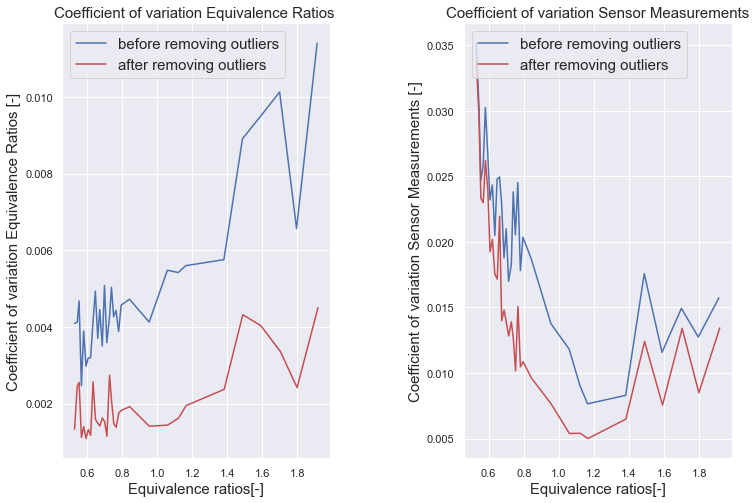

In [10]:
fig = plt.figure(figsize = (12,8))  #define figure and size (it can be changed by the user)
ax = fig.add_subplot(1, 2, 1)       #define two subplot (two figures joing together)
ax.plot(mean_ratio_unclean, CV_ratio_unclean, color='b',label='before removing outliers') #graph line before removing outliers
ax.plot(mean_ratio_clean, CV_ratio_clean, color='r', label='after removing outliers') #graph line after removing outliers
ax.set_xlabel('Equivalence ratios[-]',fontsize=15)                                   #define x label
ax.set_ylabel('Coefficient of variation Equivalence Ratios [-]',fontsize=15)         #define y label
ax.set_title('Coefficient of variation Equivalence Ratios ',fontsize=15)             #define title
plt.legend(loc='upper left',fontsize=15)           #insert legend upper left(position can be changed by the user)
#repeat the same procedure explained above for sensor measurements
ax=fig.add_subplot(1,2,2)
ax.plot(mean_ratio_unclean, CV_sensor_unclean, color='b',label='before removing outliers')
ax.plot(mean_ratio_clean, CV_sensor_clean, color='r',label='after removing outliers')
ax.set_xlabel('Equivalence ratios[-]',fontsize=15)
ax.set_ylabel('Coefficient of variation Sensor Measurements [-]',fontsize=15)
ax.set_title('Coefficient of variation Sensor Measurements',fontsize=15)
plt.legend(loc='upper left',fontsize=15)
fig.subplots_adjust(hspace=.5,wspace=0.5)
plt.show()

In [11]:
# print some values for checking that program is running properly, they can be omitted by the user
print(mean_ratio_unclean[0],mean_ratio_clean[0])
print(CV_ratio_unclean[0],CV_ratio_clean[0])

0.5292221663996601 0.52966381626468
0.0040903766757469946 0.001332396590889283
